In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# set seed for reproducibility
np.random.seed(0)

In [2]:
# load DF
df = pd.read_csv(r"C:\Users\Ania\data_scraping.csv", sep= ";")

In [3]:
df

,Tytul,Cena,Lokalizacja,URL,Powierzchnia,Forma własności,Liczba pokoi,Stan wykończenia,Piętro,Balkon / ogród / taras,...,Dostępne od,Rok budowy,Rodzaj zabudowy,Okna,Winda,Media,Zabezpieczenia,Wyposażenie,Informacje dodatkowe,Materiał budynku
0,B9 Miejski Las Kołobrzeg,457800,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b9-miejski-las...,42 m²,pełna własność,2,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
1,B8 Miejski Las Kołobrzeg,664900,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b8-miejski-las...,61 m²,pełna własność,3,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
2,B7 Miejski Las Kołobrzeg,672530,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b7-miejski-las...,"61,7 m²",pełna własność,3,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
3,B6 Miejski Las Kołobrzeg,505760,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b6-miejski-las...,"46,4 m²",pełna własność,2,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
4,B5 Miejski Las Kołobrzeg,416380,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b5-miejski-las...,"38,2 m²",pełna własność,2,do wykończenia,parter/4,ogródek,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,Jedyny taki w Kołobrzegu,1500000,"Kołobrzeg, kołobrzeski, zachodniopomorskie",https://www.otodom.pl/pl/oferta/jedyny-taki-w-...,"77,4 m²",pełna własność,2,zapytaj,> 10/11,taras,...,brak informacji,2006,apartamentowiec,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
1577,Eleganckie mieszkanie z widokiem na starówkę!,999000,"Kołobrzeg, Centrum",https://www.otodom.pl/pl/oferta/eleganckie-mie...,"102,91 m²",pełna własność,4,do zamieszkania,3/5,balkon,...,2019-10-21,1999,kamienica,plastikowe,nie,"telewizja kablowa, internet, telefon","drzwi / okna antywłamaniowe, domofon / wideofo...","zmywarka, lodówka, piekarnik, kuchenka, pralka","piwnica, oddzielna kuchnia, pom. użytkowe",cegła
1578,Podczele Kołobrzeg Mieszkanie 3 pokoje,339000,"Lwowska, Kołobrzeg, kołobrzeski, zachodniopomo...",https://www.otodom.pl/pl/oferta/podczele-kolob...,"45,23 m²",pełna własność,3,do zamieszkania,4/4,balkon,...,brak informacji,1980,blok,brak informacji,nie,brak informacji,brak informacji,brak informacji,oddzielna kuchnia,cegła
1579,Mieszkanie w centrum miasta Widok Na Rzekę,750000,"Budowlana, Kołobrzeg, kołobrzeski, zachodniopo...",https://www.otodom.pl/pl/oferta/mieszkanie-w-c...,"98,9 m²",pełna własność,5,do zamieszkania,3/3,"balkon, taras",...,brak informacji,2004,blok,brak informacji,nie,"telewizja kablowa, internet",brak informacji,brak informacji,"piwnica, oddzielna kuchnia, dwupoziomowe",cegła


In [4]:
df.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'URL', 'Powierzchnia',
       'Forma własności', 'Liczba pokoi', 'Stan wykończenia', 'Piętro',
       'Balkon / ogród / taras', 'Czynsz', 'Miejsce parkingowe',
       'Obsługa zdalna', 'Ogrzewanie', 'Rynek', 'Typ ogłoszeniodawcy',
       'Dostępne od', 'Rok budowy', 'Rodzaj zabudowy', 'Okna', 'Winda',
       'Media', 'Zabezpieczenia', 'Wyposażenie', 'Informacje dodatkowe',
       'Materiał budynku'],
      dtype='object')

In [5]:
df.describe()

,Liczba pokoi
count,1581.000000
mean,2.135357
std,0.897618
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Tytul                   1581 non-null   object
 1   Cena                    1581 non-null   object
 2   Lokalizacja             1581 non-null   object
 3   URL                     1581 non-null   object
 4   Powierzchnia            1581 non-null   object
 5   Forma własności         1581 non-null   object
 6   Liczba pokoi            1581 non-null   int64 
 7   Stan wykończenia        1581 non-null   object
 8   Piętro                  1581 non-null   object
 9   Balkon / ogród / taras  1581 non-null   object
 10  Czynsz                  1581 non-null   object
 11  Miejsce parkingowe      1581 non-null   object
 12  Obsługa zdalna          1512 non-null   object
 13  Ogrzewanie              1581 non-null   object
 14  Rynek                   1581 non-null   object
 15  Typ 

In [7]:
df["Cena"].value_counts()

575000          82
Zapytajocenę    72
550000          19
560000          14
689000          11
                ..
1158650,78       1
1296485,19       1
1166153,78       1
1139142,98       1
814752           1
Name: Cena, Length: 930, dtype: int64

In [8]:
df_clear = df[df["Cena"]!="Zapytajocenę"]

In [9]:
df_clear

,Tytul,Cena,Lokalizacja,URL,Powierzchnia,Forma własności,Liczba pokoi,Stan wykończenia,Piętro,Balkon / ogród / taras,...,Dostępne od,Rok budowy,Rodzaj zabudowy,Okna,Winda,Media,Zabezpieczenia,Wyposażenie,Informacje dodatkowe,Materiał budynku
0,B9 Miejski Las Kołobrzeg,457800,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b9-miejski-las...,42 m²,pełna własność,2,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
1,B8 Miejski Las Kołobrzeg,664900,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b8-miejski-las...,61 m²,pełna własność,3,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
2,B7 Miejski Las Kołobrzeg,672530,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b7-miejski-las...,"61,7 m²",pełna własność,3,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
3,B6 Miejski Las Kołobrzeg,505760,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b6-miejski-las...,"46,4 m²",pełna własność,2,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
4,B5 Miejski Las Kołobrzeg,416380,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b5-miejski-las...,"38,2 m²",pełna własność,2,do wykończenia,parter/4,ogródek,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,Jedyny taki w Kołobrzegu,1500000,"Kołobrzeg, kołobrzeski, zachodniopomorskie",https://www.otodom.pl/pl/oferta/jedyny-taki-w-...,"77,4 m²",pełna własność,2,zapytaj,> 10/11,taras,...,brak informacji,2006,apartamentowiec,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
1577,Eleganckie mieszkanie z widokiem na starówkę!,999000,"Kołobrzeg, Centrum",https://www.otodom.pl/pl/oferta/eleganckie-mie...,"102,91 m²",pełna własność,4,do zamieszkania,3/5,balkon,...,2019-10-21,1999,kamienica,plastikowe,nie,"telewizja kablowa, internet, telefon","drzwi / okna antywłamaniowe, domofon / wideofo...","zmywarka, lodówka, piekarnik, kuchenka, pralka","piwnica, oddzielna kuchnia, pom. użytkowe",cegła
1578,Podczele Kołobrzeg Mieszkanie 3 pokoje,339000,"Lwowska, Kołobrzeg, kołobrzeski, zachodniopomo...",https://www.otodom.pl/pl/oferta/podczele-kolob...,"45,23 m²",pełna własność,3,do zamieszkania,4/4,balkon,...,brak informacji,1980,blok,brak informacji,nie,brak informacji,brak informacji,brak informacji,oddzielna kuchnia,cegła
1579,Mieszkanie w centrum miasta Widok Na Rzekę,750000,"Budowlana, Kołobrzeg, kołobrzeski, zachodniopo...",https://www.otodom.pl/pl/oferta/mieszkanie-w-c...,"98,9 m²",pełna własność,5,do zamieszkania,3/3,"balkon, taras",...,brak informacji,2004,blok,brak informacji,nie,"telewizja kablowa, internet",brak informacji,brak informacji,"piwnica, oddzielna kuchnia, dwupoziomowe",cegła


In [10]:
df_clear["Cena"].value_counts()

575000        82
550000        19
560000        14
689000        11
316268,20     10
              ..
1158650,78     1
1296485,19     1
1166153,78     1
1139142,98     1
814752         1
Name: Cena, Length: 929, dtype: int64

In [11]:
df_clear["Cena"] = df_clear["Cena"].apply(lambda p: p.replace(",", "."))

from bs4 import BeautifulSoup as bs
import requests

link = r"https://www.bankier.pl/waluty/kursy-walut/forex/EURPLN"

r = requests.get(link)

soup = bs(r.content, features = "html.parser")

kurs_eur = float(soup.find("div", {"class": "profilLast"}).get_text().strip().replace(",", "."))



C:\Users\Ania\AppData\Local\Temp\ipykernel_15656\3104386126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["Cena"] = df_clear["Cena"].apply(lambda p: p.replace(",", "."))


In [12]:

type(kurs_eur)

float

In [13]:
def convert_to_PLN(row):
    
    if "EUR" in row:
        row = float(row.split("EUR")[0]) * kurs_eur
        
    return row

df_clear["Cena"] = df_clear["Cena"].apply(lambda row: convert_to_PLN(row))
df_clear
    

C:\Users\Ania\AppData\Local\Temp\ipykernel_15656\2140784492.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["Cena"] = df_clear["Cena"].apply(lambda row: convert_to_PLN(row))


,Tytul,Cena,Lokalizacja,URL,Powierzchnia,Forma własności,Liczba pokoi,Stan wykończenia,Piętro,Balkon / ogród / taras,...,Dostępne od,Rok budowy,Rodzaj zabudowy,Okna,Winda,Media,Zabezpieczenia,Wyposażenie,Informacje dodatkowe,Materiał budynku
0,B9 Miejski Las Kołobrzeg,457800,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b9-miejski-las...,42 m²,pełna własność,2,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
1,B8 Miejski Las Kołobrzeg,664900,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b8-miejski-las...,61 m²,pełna własność,3,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
2,B7 Miejski Las Kołobrzeg,672530,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b7-miejski-las...,"61,7 m²",pełna własność,3,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
3,B6 Miejski Las Kołobrzeg,505760,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b6-miejski-las...,"46,4 m²",pełna własność,2,do wykończenia,1/4,balkon,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
4,B5 Miejski Las Kołobrzeg,416380,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",https://www.otodom.pl/pl/oferta/b5-miejski-las...,"38,2 m²",pełna własność,2,do wykończenia,parter/4,ogródek,...,brak informacji,2020,blok,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,Jedyny taki w Kołobrzegu,1500000,"Kołobrzeg, kołobrzeski, zachodniopomorskie",https://www.otodom.pl/pl/oferta/jedyny-taki-w-...,"77,4 m²",pełna własność,2,zapytaj,> 10/11,taras,...,brak informacji,2006,apartamentowiec,brak informacji,tak,brak informacji,brak informacji,brak informacji,brak informacji,brak informacji
1577,Eleganckie mieszkanie z widokiem na starówkę!,999000,"Kołobrzeg, Centrum",https://www.otodom.pl/pl/oferta/eleganckie-mie...,"102,91 m²",pełna własność,4,do zamieszkania,3/5,balkon,...,2019-10-21,1999,kamienica,plastikowe,nie,"telewizja kablowa, internet, telefon","drzwi / okna antywłamaniowe, domofon / wideofo...","zmywarka, lodówka, piekarnik, kuchenka, pralka","piwnica, oddzielna kuchnia, pom. użytkowe",cegła
1578,Podczele Kołobrzeg Mieszkanie 3 pokoje,339000,"Lwowska, Kołobrzeg, kołobrzeski, zachodniopomo...",https://www.otodom.pl/pl/oferta/podczele-kolob...,"45,23 m²",pełna własność,3,do zamieszkania,4/4,balkon,...,brak informacji,1980,blok,brak informacji,nie,brak informacji,brak informacji,brak informacji,oddzielna kuchnia,cegła
1579,Mieszkanie w centrum miasta Widok Na Rzekę,750000,"Budowlana, Kołobrzeg, kołobrzeski, zachodniopo...",https://www.otodom.pl/pl/oferta/mieszkanie-w-c...,"98,9 m²",pełna własność,5,do zamieszkania,3/3,"balkon, taras",...,brak informacji,2004,blok,brak informacji,nie,"telewizja kablowa, internet",brak informacji,brak informacji,"piwnica, oddzielna kuchnia, dwupoziomowe",cegła


In [14]:
df_clear["Cena"] = df_clear["Cena"].astype(float)


C:\Users\Ania\AppData\Local\Temp\ipykernel_15656\1906994478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["Cena"] = df_clear["Cena"].astype(float)


In [15]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1580
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tytul                   1509 non-null   object 
 1   Cena                    1509 non-null   float64
 2   Lokalizacja             1509 non-null   object 
 3   URL                     1509 non-null   object 
 4   Powierzchnia            1509 non-null   object 
 5   Forma własności         1509 non-null   object 
 6   Liczba pokoi            1509 non-null   int64  
 7   Stan wykończenia        1509 non-null   object 
 8   Piętro                  1509 non-null   object 
 9   Balkon / ogród / taras  1509 non-null   object 
 10  Czynsz                  1509 non-null   object 
 11  Miejsce parkingowe      1509 non-null   object 
 12  Obsługa zdalna          1440 non-null   object 
 13  Ogrzewanie              1509 non-null   object 
 14  Rynek                   1509 non-null   

In [16]:
df_clear["Długość tytułu"] = df_clear["Tytul"].apply(lambda p: len(p))

C:\Users\Ania\AppData\Local\Temp\ipykernel_15656\1535028359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear["Długość tytułu"] = df_clear["Tytul"].apply(lambda p: len(p))


In [17]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1580
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tytul                   1509 non-null   object 
 1   Cena                    1509 non-null   float64
 2   Lokalizacja             1509 non-null   object 
 3   URL                     1509 non-null   object 
 4   Powierzchnia            1509 non-null   object 
 5   Forma własności         1509 non-null   object 
 6   Liczba pokoi            1509 non-null   int64  
 7   Stan wykończenia        1509 non-null   object 
 8   Piętro                  1509 non-null   object 
 9   Balkon / ogród / taras  1509 non-null   object 
 10  Czynsz                  1509 non-null   object 
 11  Miejsce parkingowe      1509 non-null   object 
 12  Obsługa zdalna          1440 non-null   object 
 13  Ogrzewanie              1509 non-null   object 
 14  Rynek                   1509 non-null   

In [18]:
df_clear = df_clear.drop(columns = ["URL"])

In [19]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1580
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tytul                   1509 non-null   object 
 1   Cena                    1509 non-null   float64
 2   Lokalizacja             1509 non-null   object 
 3   Powierzchnia            1509 non-null   object 
 4   Forma własności         1509 non-null   object 
 5   Liczba pokoi            1509 non-null   int64  
 6   Stan wykończenia        1509 non-null   object 
 7   Piętro                  1509 non-null   object 
 8   Balkon / ogród / taras  1509 non-null   object 
 9   Czynsz                  1509 non-null   object 
 10  Miejsce parkingowe      1509 non-null   object 
 11  Obsługa zdalna          1440 non-null   object 
 12  Ogrzewanie              1509 non-null   object 
 13  Rynek                   1509 non-null   object 
 14  Typ ogłoszeniodawcy     1509 non-null   

In [20]:
df_clear["Powierzchnia"] = df_clear["Powierzchnia"].apply(lambda p: float(p.split("m²")[0].replace(",", ".").strip()))

In [21]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1580
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tytul                   1509 non-null   object 
 1   Cena                    1509 non-null   float64
 2   Lokalizacja             1509 non-null   object 
 3   Powierzchnia            1509 non-null   float64
 4   Forma własności         1509 non-null   object 
 5   Liczba pokoi            1509 non-null   int64  
 6   Stan wykończenia        1509 non-null   object 
 7   Piętro                  1509 non-null   object 
 8   Balkon / ogród / taras  1509 non-null   object 
 9   Czynsz                  1509 non-null   object 
 10  Miejsce parkingowe      1509 non-null   object 
 11  Obsługa zdalna          1440 non-null   object 
 12  Ogrzewanie              1509 non-null   object 
 13  Rynek                   1509 non-null   object 
 14  Typ ogłoszeniodawcy     1509 non-null   

In [22]:
df_clear["Forma własności"].value_counts()

pełna własność               995
zapytaj                      489
spółdzielcze własnościowe     20
spółdzielcze wł. z KW          5
Name: Forma własności, dtype: int64

In [23]:
# one hot encoding - tworzymy kolumny.
df_clear = pd.get_dummies(df_clear, columns = ["Forma własności"])

In [24]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1580
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1509 non-null   object 
 1   Cena                                       1509 non-null   float64
 2   Lokalizacja                                1509 non-null   object 
 3   Powierzchnia                               1509 non-null   float64
 4   Liczba pokoi                               1509 non-null   int64  
 5   Stan wykończenia                           1509 non-null   object 
 6   Piętro                                     1509 non-null   object 
 7   Balkon / ogród / taras                     1509 non-null   object 
 8   Czynsz                                     1509 non-null   object 
 9   Miejsce parkingowe                         1509 non-null   object 
 10  Obsługa zdalna          

In [25]:
df_clear["Stan wykończenia"].value_counts()

do wykończenia     735
zapytaj            431
do zamieszkania    326
do remontu          17
Name: Stan wykończenia, dtype: int64

In [26]:
df_clear = pd.get_dummies(df_clear, columns = ["Stan wykończenia"])

In [27]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 1580
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1509 non-null   object 
 1   Cena                                       1509 non-null   float64
 2   Lokalizacja                                1509 non-null   object 
 3   Powierzchnia                               1509 non-null   float64
 4   Liczba pokoi                               1509 non-null   int64  
 5   Piętro                                     1509 non-null   object 
 6   Balkon / ogród / taras                     1509 non-null   object 
 7   Czynsz                                     1509 non-null   object 
 8   Miejsce parkingowe                         1509 non-null   object 
 9   Obsługa zdalna                             1440 non-null   object 
 10  Ogrzewanie              

In [28]:
df_clear["Piętro"].value_counts()

1/4         217
4/4         147
2/4         118
3/4         117
parter/4    105
           ... 
4/3           1
suterena      1
3/1           1
2/8           1
parter/6      1
Name: Piętro, Length: 74, dtype: int64

In [29]:
df_clear["Piętro"] = df_clear["Piętro"].apply(lambda p: p.replace("parter", "0"))

In [30]:
df_clear["Piętro"].value_counts()

1/4         217
4/4         147
2/4         118
3/4         117
0/4         105
           ... 
4/3           1
suterena      1
3/1           1
2/8           1
0/6           1
Name: Piętro, Length: 74, dtype: int64

In [31]:
pd.set_option("display.max_rows", None)
df_clear.head(100)

,Tytul,Cena,Lokalizacja,Powierzchnia,Liczba pokoi,Piętro,Balkon / ogród / taras,Czynsz,Miejsce parkingowe,Obsługa zdalna,...,Materiał budynku,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,Stan wykończenia_do wykończenia,Stan wykończenia_do zamieszkania,Stan wykończenia_zapytaj
0,B9 Miejski Las Kołobrzeg,457800.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",42.00,2,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
1,B8 Miejski Las Kołobrzeg,664900.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.00,3,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
2,B7 Miejski Las Kołobrzeg,672530.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.70,3,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
3,B6 Miejski Las Kołobrzeg,505760.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",46.40,2,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
4,B5 Miejski Las Kołobrzeg,416380.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",38.20,2,0/4,ogródek,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
5,"Mieszkanie 2-poziomowe, Zieleniewo, k. Kołobrzegu",420000.0,"ul. Szczecińska , Zieleniewo, zachodniopomorskie",59.00,3,1,balkon,400 zł,garaż/miejsce parkingowe,zapytaj,...,frontend.ad.table-information-value-building_m...,49,1,0,0,0,0,0,1,0
6,"! Uzdrowiska ! Cesja, 2 pok., Basen, +23%!",420000.0,"Hugo Kołłątaja, Kołobrzeg, zachodniopomorskie",35.04,2,0/4,balkon,350 zł,zapytaj,zapytaj,...,brak informacji,42,1,0,0,0,0,1,0,0
7,"! Studio, 3 osoby, balkon, topowe wykończenie!",504900.0,"Jana Kasprowicza, Kołobrzeg, zachodniopomorskie",28.05,1,5/6,balkon,300 zł,zapytaj,zapytaj,...,brak informacji,46,1,0,0,0,0,0,1,0
8,"! Apartament 2- pokojowy Aquarius, mieszkalny !",1099000.0,"Aleksandra Fredry, Kołobrzeg, kołobrzeski, zac...",49.52,2,0/4,balkon,600 zł,garaż/miejsce parkingowe,zapytaj,...,brak informacji,47,1,0,0,0,0,0,1,0
9,"! Apartament 2- pokojowy Diune Resort, 20m morze!",1020000.0,"Antoniego Sułkowskiego, Kołobrzeg, kołobrzeski...",40.86,2,1/6,balkon,500 zł,garaż/miejsce parkingowe,zapytaj,...,brak informacji,49,1,0,0,0,0,0,1,0


In [32]:
sum(df_clear["Piętro"] == "zapytaj")

15

In [33]:
df_clear = df_clear[df_clear["Piętro"] != "zapytaj"]

In [34]:
df_clear.head(100)

,Tytul,Cena,Lokalizacja,Powierzchnia,Liczba pokoi,Piętro,Balkon / ogród / taras,Czynsz,Miejsce parkingowe,Obsługa zdalna,...,Materiał budynku,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,Stan wykończenia_do wykończenia,Stan wykończenia_do zamieszkania,Stan wykończenia_zapytaj
0,B9 Miejski Las Kołobrzeg,457800.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",42.00,2,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
1,B8 Miejski Las Kołobrzeg,664900.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.00,3,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
2,B7 Miejski Las Kołobrzeg,672530.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.70,3,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
3,B6 Miejski Las Kołobrzeg,505760.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",46.40,2,1/4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
4,B5 Miejski Las Kołobrzeg,416380.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",38.20,2,0/4,ogródek,zapytaj,garaż/miejsce parkingowe,zapytaj,...,brak informacji,24,1,0,0,0,0,1,0,0
5,"Mieszkanie 2-poziomowe, Zieleniewo, k. Kołobrzegu",420000.0,"ul. Szczecińska , Zieleniewo, zachodniopomorskie",59.00,3,1,balkon,400 zł,garaż/miejsce parkingowe,zapytaj,...,frontend.ad.table-information-value-building_m...,49,1,0,0,0,0,0,1,0
6,"! Uzdrowiska ! Cesja, 2 pok., Basen, +23%!",420000.0,"Hugo Kołłątaja, Kołobrzeg, zachodniopomorskie",35.04,2,0/4,balkon,350 zł,zapytaj,zapytaj,...,brak informacji,42,1,0,0,0,0,1,0,0
7,"! Studio, 3 osoby, balkon, topowe wykończenie!",504900.0,"Jana Kasprowicza, Kołobrzeg, zachodniopomorskie",28.05,1,5/6,balkon,300 zł,zapytaj,zapytaj,...,brak informacji,46,1,0,0,0,0,0,1,0
8,"! Apartament 2- pokojowy Aquarius, mieszkalny !",1099000.0,"Aleksandra Fredry, Kołobrzeg, kołobrzeski, zac...",49.52,2,0/4,balkon,600 zł,garaż/miejsce parkingowe,zapytaj,...,brak informacji,47,1,0,0,0,0,0,1,0
9,"! Apartament 2- pokojowy Diune Resort, 20m morze!",1020000.0,"Antoniego Sułkowskiego, Kołobrzeg, kołobrzeski...",40.86,2,1/6,balkon,500 zł,garaż/miejsce parkingowe,zapytaj,...,brak informacji,49,1,0,0,0,0,0,1,0


In [35]:
df_clear["Piętro"].value_counts()

1/4           217
4/4           147
2/4           118
3/4           117
0/4           105
1/3            65
3/3            62
1              58
2/3            58
2              47
0/3            44
0              37
3              29
1/6            27
4/6            26
4/5            24
5/6            24
6/6            22
2/6            20
3/6            19
2/2            17
1/2            17
0/1            17
1/1            16
3/5            16
1/5            15
0/2            14
4              13
5/5            10
2/5            10
2/7             6
0/5             6
1/7             5
> 10/13         4
0/7             3
5               3
6/7             3
3/7             3
5/4             3
poddasze        3
6/10            2
2/13            2
3/13            2
7/7             2
5/7             2
> 10/14         2
3/11            2
8/10            2
4/7             2
5/10            2
> 10/11         2
8/12            1
3/12            1
7/13            1
6/13            1
5/8       

In [36]:
suterena_indices = np.where([df.Piętro.str.contains("suterena")])[1]
poddasze_indices = np.where([df.Piętro.str.contains("poddasze")])[1]

In [37]:
df_clear = df_clear.drop(suterena_indices)
df_clear = df_clear.drop(poddasze_indices)

In [38]:
df_clear["Piętro"].value_counts()

1/4        217
4/4        147
2/4        118
3/4        117
0/4        105
1/3         65
3/3         62
2/3         58
1           58
2           47
0/3         44
0           37
3           29
1/6         27
4/6         26
4/5         24
5/6         24
6/6         22
2/6         20
3/6         19
2/2         17
0/1         17
1/2         17
1/1         16
3/5         16
1/5         15
0/2         14
4           13
5/5         10
2/5         10
2/7          6
0/5          6
1/7          5
> 10/13      4
0/7          3
5            3
6/7          3
5/4          3
3/7          3
3/13         2
7/7          2
5/7          2
2/13         2
6/10         2
> 10/14      2
5/10         2
3/11         2
4/7          2
8/10         2
> 10/11      2
1/12         1
3/8          1
7/13         1
6/13         1
5/8          1
1/8          1
6/11         1
9/11         1
7/12         1
8/12         1
2/8          1
8/11         1
0/6          1
7/11         1
3/2          1
8            1
3/12      

In [39]:
df_clear["Piętro"] = df_clear["Piętro"].apply(lambda p: p.replace("> ", ""))

In [40]:
df_clear["Piętro"].value_counts()

1/4      217
4/4      147
2/4      118
3/4      117
0/4      105
1/3       65
3/3       62
2/3       58
1         58
2         47
0/3       44
0         37
3         29
1/6       27
4/6       26
4/5       24
5/6       24
6/6       22
2/6       20
3/6       19
2/2       17
0/1       17
1/2       17
1/1       16
3/5       16
1/5       15
0/2       14
4         13
5/5       10
2/5       10
2/7        6
0/5        6
1/7        5
10/13      4
0/7        3
5          3
6/7        3
5/4        3
3/7        3
3/13       2
7/7        2
5/7        2
2/13       2
6/10       2
10/14      2
5/10       2
3/11       2
4/7        2
8/10       2
10/11      2
1/12       1
3/8        1
7/13       1
6/13       1
5/8        1
1/8        1
6/11       1
9/11       1
7/12       1
8/12       1
2/8        1
8/11       1
0/6        1
7/11       1
3/2        1
8          1
3/12       1
4/3        1
6/8        1
3/1        1
Name: Piętro, dtype: int64

In [41]:
df_clear["piętro"] = df_clear["Piętro"].apply(lambda p: float(p.split("/")[0]))

In [42]:
df_clear["piętro"]

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
5        1.0
6        0.0
7        5.0
8        0.0
9        1.0
10       3.0
11       2.0
12       3.0
13       3.0
14       8.0
15       4.0
16       4.0
17       1.0
18       0.0
19       5.0
20       2.0
21       1.0
22       1.0
23       1.0
24       2.0
25       3.0
26       4.0
27       5.0
28       1.0
29       0.0
30       4.0
31       2.0
32       1.0
33       3.0
34       1.0
35       0.0
36       4.0
37       1.0
38       4.0
39       1.0
40       2.0
41       1.0
42       0.0
43       0.0
44       4.0
45       5.0
46       0.0
47       3.0
48       0.0
49       4.0
50       4.0
51       2.0
52       3.0
53       3.0
54       3.0
55       1.0
56       4.0
58       3.0
59       3.0
60       3.0
61       3.0
62       4.0
63       3.0
64       3.0
65       1.0
66       2.0
67       6.0
68       1.0
69       1.0
70       1.0
71       1.0
72       4.0
73       1.0
74       6.0
75       6.0
76       6.0
78       1.0

In [43]:
df_clear.rename(columns={"Piętro": "Całkowita liczba pięter"}, inplace=True)

In [44]:
df_clear.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Balkon / ogród / taras', 'Czynsz',
       'Miejsce parkingowe', 'Obsługa zdalna', 'Ogrzewanie', 'Rynek',
       'Typ ogłoszeniodawcy', 'Dostępne od', 'Rok budowy', 'Rodzaj zabudowy',
       'Okna', 'Winda', 'Media', 'Zabezpieczenia', 'Wyposażenie',
       'Informacje dodatkowe', 'Materiał budynku', 'Długość tytułu',
       'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro'],
      dtype='object')

In [45]:
import re
#df_clear["Całkowita liczba pięter"] = df_clear["Całkowita liczba pięter"].apply(lambda p: p.replace(r'[^./]',''))
#df_clear["Całkowita liczba pięter"] = df_clear["Całkowita liczba pięter"].replace(to_replace=r'^[0-15]/', value=r"", regex=True)

def replace_values(row):
    if "/" in row:
        return row.split("/")[1]
    else:
        return row

df_clear["Całkowita liczba pięter"] = df_clear["Całkowita liczba pięter"].apply(lambda x: replace_values(x))


In [46]:
df_clear["Całkowita liczba pięter"]

0        4
1        4
2        4
3        4
4        4
5        1
6        4
7        6
8        4
9        6
10       4
11       4
12       4
13      12
14      10
15       4
16       5
17       2
18       2
19       5
20       4
21       5
22       5
23       5
24       5
25       5
26       5
27       5
28       5
29       4
30       5
31       2
32       5
33       3
34       4
35       2
36       4
37       3
38       4
39       2
40       4
41       6
42       4
43       3
44       4
45      10
46       4
47       3
48       5
49       4
50       4
51       4
52       4
53       3
54       4
55       4
56       4
58       4
59       5
60       4
61       4
62       4
63       4
64       4
65       6
66       6
67       6
68       6
69       6
70       6
71       6
72       6
73       6
74       6
75       6
76       6
78       2
79       3
80       4
81       3
82       3
83       6
84       4
85       4
86       6
87      11
88       4
89       4
90       4
91       7
92       4

In [47]:
df_clear["Całkowita liczba pięter"] = df_clear["Całkowita liczba pięter"].astype(int)

In [48]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 1580
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1489 non-null   object 
 1   Cena                                       1489 non-null   float64
 2   Lokalizacja                                1489 non-null   object 
 3   Powierzchnia                               1489 non-null   float64
 4   Liczba pokoi                               1489 non-null   int64  
 5   Całkowita liczba pięter                    1489 non-null   int32  
 6   Balkon / ogród / taras                     1489 non-null   object 
 7   Czynsz                                     1489 non-null   object 
 8   Miejsce parkingowe                         1489 non-null   object 
 9   Obsługa zdalna                             1422 non-null   object 
 10  Ogrzewanie              

In [49]:
df_clear.head()

,Tytul,Cena,Lokalizacja,Powierzchnia,Liczba pokoi,Całkowita liczba pięter,Balkon / ogród / taras,Czynsz,Miejsce parkingowe,Obsługa zdalna,...,Długość tytułu,Forma własności_pełna własność,Forma własności_spółdzielcze wł. z KW,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,Stan wykończenia_do wykończenia,Stan wykończenia_do zamieszkania,Stan wykończenia_zapytaj,piętro
0,B9 Miejski Las Kołobrzeg,457800.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",42.0,2,4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,24,1,0,0,0,0,1,0,0,1.0
1,B8 Miejski Las Kołobrzeg,664900.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.0,3,4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,24,1,0,0,0,0,1,0,0,1.0
2,B7 Miejski Las Kołobrzeg,672530.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.7,3,4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,24,1,0,0,0,0,1,0,0,1.0
3,B6 Miejski Las Kołobrzeg,505760.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",46.4,2,4,balkon,zapytaj,garaż/miejsce parkingowe,zapytaj,...,24,1,0,0,0,0,1,0,0,1.0
4,B5 Miejski Las Kołobrzeg,416380.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",38.2,2,4,ogródek,zapytaj,garaż/miejsce parkingowe,zapytaj,...,24,1,0,0,0,0,1,0,0,0.0


In [50]:
df_clear["Balkon / ogród / taras"].value_counts()

balkon                    1005
zapytaj                    156
balkon, taras              150
taras                       97
ogródek                     33
balkon, ogródek             20
balkon, ogródek, taras      17
ogródek, taras              11
Name: Balkon / ogród / taras, dtype: int64

In [51]:
df_clear["Balkon"] = df_clear['Balkon / ogród / taras'].copy()

def insert_balcony(row):
    if "balkon" in row:
        return 1
    else:
        return 0

df_clear["Balkon"] = df_clear["Balkon"].apply(lambda x: insert_balcony(x))

In [52]:
df_clear["Ogród"] = df_clear['Balkon / ogród / taras'].copy()

def insert_garden(row):
    if "ogródek" in row:
        return 1
    else:
        return 0

df_clear["Ogród"] = df_clear["Ogród"].apply(lambda x: insert_garden(x))

In [53]:
df_clear["Taras"] = df_clear['Balkon / ogród / taras'].copy()

def insert_terrace(row):
    if "taras" in row:
        return 1
    else:
        return 0

df_clear["Taras"] = df_clear["Taras"].apply(lambda x: insert_terrace(x))

In [54]:
df_clear.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Balkon / ogród / taras', 'Czynsz',
       'Miejsce parkingowe', 'Obsługa zdalna', 'Ogrzewanie', 'Rynek',
       'Typ ogłoszeniodawcy', 'Dostępne od', 'Rok budowy', 'Rodzaj zabudowy',
       'Okna', 'Winda', 'Media', 'Zabezpieczenia', 'Wyposażenie',
       'Informacje dodatkowe', 'Materiał budynku', 'Długość tytułu',
       'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras'],
      dtype='object')

In [55]:
df_clear.drop(columns=["Balkon / ogród / taras"], inplace=True)


In [56]:
df_clear.columns 

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Czynsz', 'Miejsce parkingowe',
       'Obsługa zdalna', 'Ogrzewanie', 'Rynek', 'Typ ogłoszeniodawcy',
       'Dostępne od', 'Rok budowy', 'Rodzaj zabudowy', 'Okna', 'Winda',
       'Media', 'Zabezpieczenia', 'Wyposażenie', 'Informacje dodatkowe',
       'Materiał budynku', 'Długość tytułu', 'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras'],
      dtype='object')

In [57]:
df_clear["Dostępne od"]

0       brak informacji
1       brak informacji
2       brak informacji
3       brak informacji
4       brak informacji
5       brak informacji
6       brak informacji
7       brak informacji
8       brak informacji
9       brak informacji
10      brak informacji
11      brak informacji
12      brak informacji
13      brak informacji
14      brak informacji
15      brak informacji
16           2022-09-15
17      brak informacji
18           2022-01-17
19      brak informacji
20      brak informacji
21      brak informacji
22      brak informacji
23      brak informacji
24      brak informacji
25      brak informacji
26      brak informacji
27      brak informacji
28      brak informacji
29      brak informacji
30      brak informacji
31      brak informacji
32      brak informacji
33      brak informacji
34      brak informacji
35      brak informacji
36      brak informacji
37           2022-03-01
38      brak informacji
39      brak informacji
40      brak informacji
41      brak inf

In [58]:
sum(df_clear["Dostępne od"] == "brak informacji")

1282

In [59]:
df_clear.drop("Dostępne od", inplace = True, axis=1)

In [60]:
df_clear.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Czynsz', 'Miejsce parkingowe',
       'Obsługa zdalna', 'Ogrzewanie', 'Rynek', 'Typ ogłoszeniodawcy',
       'Rok budowy', 'Rodzaj zabudowy', 'Okna', 'Winda', 'Media',
       'Zabezpieczenia', 'Wyposażenie', 'Informacje dodatkowe',
       'Materiał budynku', 'Długość tytułu', 'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras'],
      dtype='object')

In [61]:
df_clear["Rok budowy"].value_counts()

2021               386
2023               325
2022               142
brak informacji    104
2024                88
2020                86
2019                42
2018                33
1980                22
2010                21
2006                20
1930                16
2008                16
1990                14
2009                13
2012                10
2016                10
1970                10
2007                 9
2014                 7
1987                 7
2015                 6
2017                 6
1988                 6
2013                 6
1906                 5
2011                 5
2001                 5
2000                 5
1997                 4
1975                 4
1998                 4
1993                 3
2003                 3
1999                 3
1925                 3
1960                 2
1934                 2
1982                 2
1950                 2
1968                 2
1932                 2
2004                 2
1985       

In [62]:
index = np.where([df_clear["Rok budowy"] == "93"])[1]
print(index)

[1081]


In [63]:
df_clear.iloc[index] = 1993

In [64]:
df_clear["Rok budowy"].replace(to_replace=["brak informacji"], value=np.nan, inplace=True)

In [65]:
df_clear["Rok budowy"].value_counts()

2021    386
2023    325
2022    142
2024     88
2020     86
2019     42
2018     33
1980     22
2010     21
2006     20
1930     16
2008     16
1990     14
2009     13
2012     10
2016     10
1970     10
2007      9
2014      7
1987      7
2015      6
2017      6
1988      6
2013      6
1906      5
2011      5
2001      5
2000      5
1997      4
1975      4
1998      4
1993      3
2003      3
1999      3
1925      3
1960      2
1934      2
1982      2
1950      2
1968      2
1932      2
2004      2
1985      2
2002      2
2005      2
1991      1
1945      1
1993      1
1943      1
1994      1
1946      1
1979      1
1978      1
1910      1
1900      1
1920      1
1933      1
1973      1
1908      1
1995      1
1936      1
1976      1
1926      1
1935      1
1955      1
Name: Rok budowy, dtype: int64

In [66]:
df['Rok budowy'].isna().sum()

0

In [67]:
# Imputer object using the mean strategy
imputer = SimpleImputer(strategy='mean')
#Simple imputer expects a column vector, so converting the pandas Series
df_clear["Rok budowy"] = imputer.fit_transform(df_clear["Rok budowy"].to_numpy().reshape(-1,1))

In [68]:
df_clear["Rok budowy"].value_counts()

2021.000000    386
2023.000000    325
2022.000000    142
2014.990614    104
2024.000000     88
2020.000000     86
2019.000000     42
2018.000000     33
1980.000000     22
2010.000000     21
2006.000000     20
2008.000000     16
1930.000000     16
1990.000000     14
2009.000000     13
2016.000000     10
1970.000000     10
2012.000000     10
2007.000000      9
2014.000000      7
1987.000000      7
2013.000000      6
2015.000000      6
1988.000000      6
2017.000000      6
1906.000000      5
2000.000000      5
2001.000000      5
2011.000000      5
1998.000000      4
1993.000000      4
1997.000000      4
1975.000000      4
1999.000000      3
1925.000000      3
2003.000000      3
1968.000000      2
1985.000000      2
1982.000000      2
1950.000000      2
2004.000000      2
1960.000000      2
2005.000000      2
2002.000000      2
1934.000000      2
1932.000000      2
1978.000000      1
1943.000000      1
1994.000000      1
1900.000000      1
1945.000000      1
1991.000000      1
1946.000000 

In [69]:
categorical = (df_clear.dtypes == 'object')

In [70]:
categorical[categorical]

Tytul                   True
Lokalizacja             True
Czynsz                  True
Miejsce parkingowe      True
Obsługa zdalna          True
Ogrzewanie              True
Rynek                   True
Typ ogłoszeniodawcy     True
Rodzaj zabudowy         True
Okna                    True
Winda                   True
Media                   True
Zabezpieczenia          True
Wyposażenie             True
Informacje dodatkowe    True
Materiał budynku        True
dtype: bool

In [71]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 1580
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1489 non-null   object 
 1   Cena                                       1489 non-null   float64
 2   Lokalizacja                                1489 non-null   object 
 3   Powierzchnia                               1489 non-null   float64
 4   Liczba pokoi                               1489 non-null   int64  
 5   Całkowita liczba pięter                    1489 non-null   int32  
 6   Czynsz                                     1489 non-null   object 
 7   Miejsce parkingowe                         1489 non-null   object 
 8   Obsługa zdalna                             1422 non-null   object 
 9   Ogrzewanie                                 1489 non-null   object 
 10  Rynek                   

In [72]:
df_clear.head()

,Tytul,Cena,Lokalizacja,Powierzchnia,Liczba pokoi,Całkowita liczba pięter,Czynsz,Miejsce parkingowe,Obsługa zdalna,Ogrzewanie,...,Forma własności_spółdzielcze własnościowe,Forma własności_zapytaj,Stan wykończenia_do remontu,Stan wykończenia_do wykończenia,Stan wykończenia_do zamieszkania,Stan wykończenia_zapytaj,piętro,Balkon,Ogród,Taras
0,B9 Miejski Las Kołobrzeg,457800.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",42.0,2,4,zapytaj,garaż/miejsce parkingowe,zapytaj,miejskie,...,0,0,0,1,0,0,1.0,1,0,0
1,B8 Miejski Las Kołobrzeg,664900.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.0,3,4,zapytaj,garaż/miejsce parkingowe,zapytaj,miejskie,...,0,0,0,1,0,0,1.0,1,0,0
2,B7 Miejski Las Kołobrzeg,672530.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",61.7,3,4,zapytaj,garaż/miejsce parkingowe,zapytaj,miejskie,...,0,0,0,1,0,0,1.0,1,0,0
3,B6 Miejski Las Kołobrzeg,505760.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",46.4,2,4,zapytaj,garaż/miejsce parkingowe,zapytaj,miejskie,...,0,0,0,1,0,0,1.0,1,0,0
4,B5 Miejski Las Kołobrzeg,416380.0,"ul. Tarnopolska, Kołobrzeg, kołobrzeski, zacho...",38.2,2,4,zapytaj,garaż/miejsce parkingowe,zapytaj,miejskie,...,0,0,0,1,0,0,0.0,0,1,0


In [73]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 1580
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1489 non-null   object 
 1   Cena                                       1489 non-null   float64
 2   Lokalizacja                                1489 non-null   object 
 3   Powierzchnia                               1489 non-null   float64
 4   Liczba pokoi                               1489 non-null   int64  
 5   Całkowita liczba pięter                    1489 non-null   int32  
 6   Czynsz                                     1489 non-null   object 
 7   Miejsce parkingowe                         1489 non-null   object 
 8   Obsługa zdalna                             1422 non-null   object 
 9   Ogrzewanie                                 1489 non-null   object 
 10  Rynek                   

In [74]:
df_clear["Czynsz"].value_counts()

zapytaj      976
9,50 zł      105
350 zł        30
400 zł        23
600 zł        19
380 zł        19
500 zł        18
450 zł        18
550 zł        15
420 zł        14
300 zł        11
1 zł           8
370 zł         7
360 zł         7
650 zł         6
900 zł         6
340 zł         6
700 zł         6
320 zł         6
230 zł         5
399 zł         5
200 zł         5
160 zł         4
800 zł         4
364 zł         4
560 zł         4
440 zł         4
519 zł         4
750 zł         4
280 zł         4
480 zł         3
9 zł           3
250 zł         3
680 zł         3
460 zł         3
390 zł         3
389 zł         3
330 zł         3
406 zł         2
430 zł         2
780 zł         2
240 zł         2
473 zł         2
511 zł         2
270 zł         2
489 zł         2
1 037 zł       2
610 zł         2
660 zł         2
310 zł         2
620 zł         2
630 zł         2
288 zł         2
220 zł         2
470 zł         2
374 zł         2
730 zł         2
580 zł         2
490 zł        

In [75]:
df_clear.drop(columns=["Czynsz"], inplace=True)

In [76]:
df_clear.drop(columns=["Obsługa zdalna"], inplace=True)

In [77]:
df_clear["Informacje dodatkowe"].value_counts()

brak informacji                                            1069
pom. użytkowe                                               148
piwnica                                                     107
oddzielna kuchnia                                            43
piwnica, oddzielna kuchnia                                   39
dwupoziomowe                                                 27
piwnica, pom. użytkowe                                       22
piwnica, oddzielna kuchnia, pom. użytkowe                    11
piwnica, dwupoziomowe                                         8
oddzielna kuchnia, dwupoziomowe                               5
dwupoziomowe, pom. użytkowe                                   3
piwnica, oddzielna kuchnia, dwupoziomowe                      3
piwnica, oddzielna kuchnia, dwupoziomowe, pom. użytkowe       1
oddzielna kuchnia, pom. użytkowe                              1
piwnica, dwupoziomowe, pom. użytkowe                          1
1993                                    

In [78]:
df_clear.drop(columns=["Informacje dodatkowe"], inplace=True)

In [79]:
df_clear.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Miejsce parkingowe', 'Ogrzewanie', 'Rynek',
       'Typ ogłoszeniodawcy', 'Rok budowy', 'Rodzaj zabudowy', 'Okna', 'Winda',
       'Media', 'Zabezpieczenia', 'Wyposażenie', 'Materiał budynku',
       'Długość tytułu', 'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras'],
      dtype='object')

In [80]:
df_clear["Miejsce parkingowe"].value_counts()

garaż/miejsce parkingowe    947
zapytaj                     541
1993                          1
Name: Miejsce parkingowe, dtype: int64

In [81]:
df_clear = df_clear[df_clear["Miejsce parkingowe"] != 1993]

In [82]:
df_clear["Miejsce parkingowe"].value_counts()

garaż/miejsce parkingowe    947
zapytaj                     541
Name: Miejsce parkingowe, dtype: int64

In [83]:
df_clear = df_clear.apply(lambda x: x.replace("zapytaj", "brak"))

In [84]:
df_clear["Miejsce parkingowe"].value_counts()

garaż/miejsce parkingowe    947
brak                        541
Name: Miejsce parkingowe, dtype: int64

In [85]:
df_clear = pd.get_dummies(df_clear, columns = ["Miejsce parkingowe"])

In [86]:
df_clear.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Ogrzewanie', 'Rynek', 'Typ ogłoszeniodawcy',
       'Rok budowy', 'Rodzaj zabudowy', 'Okna', 'Winda', 'Media',
       'Zabezpieczenia', 'Wyposażenie', 'Materiał budynku', 'Długość tytułu',
       'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras', 'Miejsce parkingowe_brak',
       'Miejsce parkingowe_garaż/miejsce parkingowe'],
      dtype='object')

In [87]:
df_clear.rename(columns={"Miejsce parkingowe_garaż/miejsce parkingowe": "Parking_dostępny"}, inplace=True)

In [88]:
df_clear.columns

Index(['Tytul', 'Cena', 'Lokalizacja', 'Powierzchnia', 'Liczba pokoi',
       'Całkowita liczba pięter', 'Ogrzewanie', 'Rynek', 'Typ ogłoszeniodawcy',
       'Rok budowy', 'Rodzaj zabudowy', 'Okna', 'Winda', 'Media',
       'Zabezpieczenia', 'Wyposażenie', 'Materiał budynku', 'Długość tytułu',
       'Forma własności_pełna własność',
       'Forma własności_spółdzielcze wł. z KW',
       'Forma własności_spółdzielcze własnościowe', 'Forma własności_zapytaj',
       'Stan wykończenia_do remontu', 'Stan wykończenia_do wykończenia',
       'Stan wykończenia_do zamieszkania', 'Stan wykończenia_zapytaj',
       'piętro', 'Balkon', 'Ogród', 'Taras', 'Miejsce parkingowe_brak',
       'Parking_dostępny'],
      dtype='object')

In [89]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 0 to 1580
Data columns (total 32 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1488 non-null   object 
 1   Cena                                       1488 non-null   float64
 2   Lokalizacja                                1488 non-null   object 
 3   Powierzchnia                               1488 non-null   float64
 4   Liczba pokoi                               1488 non-null   int64  
 5   Całkowita liczba pięter                    1488 non-null   int32  
 6   Ogrzewanie                                 1488 non-null   object 
 7   Rynek                                      1488 non-null   object 
 8   Typ ogłoszeniodawcy                        1488 non-null   object 
 9   Rok budowy                                 1488 non-null   float64
 10  Rodzaj zabudowy         

In [90]:
df_clear["Ogrzewanie"].value_counts()

brak             596
miejskie         476
gazowe           258
kotłownia         88
inne              67
elektryczne        2
piece kaflowe      1
Name: Ogrzewanie, dtype: int64

In [91]:
df_clear["Ogrzewanie"] = df_clear["Ogrzewanie"].apply(lambda x: x.replace("brak", "inne"))

In [92]:
df_clear["Ogrzewanie"].value_counts()

inne             663
miejskie         476
gazowe           258
kotłownia         88
elektryczne        2
piece kaflowe      1
Name: Ogrzewanie, dtype: int64

In [93]:
df_clear = df_clear[df_clear["Ogrzewanie"] != "elektryczne"]

df_clear = df_clear[df_clear["Ogrzewanie"] != "piece kaflowe"]



In [94]:
df_clear["Ogrzewanie"].value_counts()

inne         663
miejskie     476
gazowe       258
kotłownia     88
Name: Ogrzewanie, dtype: int64

In [95]:
liczba_miejskie = len(df_clear[df_clear["Ogrzewanie"] == "miejskie"])
liczba_gazowe = len(df_clear[df_clear["Ogrzewanie"] == "gazowe"])
liczba_kotłownia = len(df_clear[df_clear["Ogrzewanie"] == "kotłownia"])
liczba_znanych = len(df_clear[df_clear["Ogrzewanie"] != "inne"])

ratio_miejskie = liczba_miejskie/liczba_znanych
ratio_gazowe = liczba_gazowe/liczba_znanych
ratio_kotłownia = liczba_kotłownia/liczba_znanych

def replace_heating(row, ratio_m, ratio_g, ratio_k):

    if "inne" in row:
        return np.random.choice(['miejskie','gazowe', 'kotłownia'], p=[ratio_m, ratio_g, ratio_k])
    else:
        return row
    

df_clear["Ogrzewanie"] = df_clear["Ogrzewanie"].apply(lambda x: replace_heating(x, ratio_miejskie, ratio_gazowe, ratio_kotłownia))

In [96]:
liczba_miejskie = len(df_clear[df_clear["Ogrzewanie"] == "miejskie"])
liczba_gazowe = len(df_clear[df_clear["Ogrzewanie"] == "gazowe"])
liczba_kotłownia = len(df_clear[df_clear["Ogrzewanie"] == "kotłownia"])
liczba_znanych = len(df_clear[df_clear["Ogrzewanie"] != "inne"])

ratio_miejskie = liczba_miejskie/liczba_znanych
ratio_gazowe = liczba_gazowe/liczba_znanych
ratio_kotłownia = liczba_kotłownia/liczba_znanych

liczba_znanych

1485

In [97]:
df_clear["Ogrzewanie"].value_counts()

miejskie     860
gazowe       454
kotłownia    171
Name: Ogrzewanie, dtype: int64

In [98]:
df_clear = pd.get_dummies(df_clear, columns = ["Ogrzewanie"])

In [99]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1485 non-null   object 
 1   Cena                                       1485 non-null   float64
 2   Lokalizacja                                1485 non-null   object 
 3   Powierzchnia                               1485 non-null   float64
 4   Liczba pokoi                               1485 non-null   int64  
 5   Całkowita liczba pięter                    1485 non-null   int32  
 6   Rynek                                      1485 non-null   object 
 7   Typ ogłoszeniodawcy                        1485 non-null   object 
 8   Rok budowy                                 1485 non-null   float64
 9   Rodzaj zabudowy                            1485 non-null   object 
 10  Okna                    

In [100]:
df_clear["Rynek"].value_counts()

pierwotny    1027
wtórny        458
Name: Rynek, dtype: int64

In [101]:
df_clear = pd.get_dummies(df_clear, columns = ["Rynek"])

In [102]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1485 non-null   object 
 1   Cena                                       1485 non-null   float64
 2   Lokalizacja                                1485 non-null   object 
 3   Powierzchnia                               1485 non-null   float64
 4   Liczba pokoi                               1485 non-null   int64  
 5   Całkowita liczba pięter                    1485 non-null   int32  
 6   Typ ogłoszeniodawcy                        1485 non-null   object 
 7   Rok budowy                                 1485 non-null   float64
 8   Rodzaj zabudowy                            1485 non-null   object 
 9   Okna                                       1485 non-null   object 
 10  Winda                   

In [103]:
df_clear["Typ ogłoszeniodawcy"].value_counts()

deweloper               721
biuro nieruchomości     694
prywatny                 70
Name: Typ ogłoszeniodawcy, dtype: int64

In [104]:
df_clear = pd.get_dummies(df_clear, columns = ["Typ ogłoszeniodawcy"])

In [105]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1485 non-null   object 
 1   Cena                                       1485 non-null   float64
 2   Lokalizacja                                1485 non-null   object 
 3   Powierzchnia                               1485 non-null   float64
 4   Liczba pokoi                               1485 non-null   int64  
 5   Całkowita liczba pięter                    1485 non-null   int32  
 6   Rok budowy                                 1485 non-null   float64
 7   Rodzaj zabudowy                            1485 non-null   object 
 8   Okna                                       1485 non-null   object 
 9   Winda                                      1485 non-null   object 
 10  Media                   

In [106]:
df_clear["Rodzaj zabudowy"].value_counts() 

apartamentowiec     771
brak informacji     406
blok                251
kamienica            43
dom wolnostojący     12
szeregowiec           2
Name: Rodzaj zabudowy, dtype: int64

In [107]:
df_clear = df_clear.drop(columns=["Rodzaj zabudowy"])

In [108]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Tytul                                      1485 non-null   object 
 1   Cena                                       1485 non-null   float64
 2   Lokalizacja                                1485 non-null   object 
 3   Powierzchnia                               1485 non-null   float64
 4   Liczba pokoi                               1485 non-null   int64  
 5   Całkowita liczba pięter                    1485 non-null   int32  
 6   Rok budowy                                 1485 non-null   float64
 7   Okna                                       1485 non-null   object 
 8   Winda                                      1485 non-null   object 
 9   Media                                      1485 non-null   object 
 10  Zabezpieczenia          

In [109]:
df_clear["Okna"].value_counts() 

plastikowe         828
brak informacji    631
aluminiowe          23
drewniane            3
Name: Okna, dtype: int64

In [110]:
df_clear = df_clear.drop(columns=["Okna"])

In [111]:
df_clear = df_clear.drop(columns=["Tytul"])

In [112]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cena                                       1485 non-null   float64
 1   Lokalizacja                                1485 non-null   object 
 2   Powierzchnia                               1485 non-null   float64
 3   Liczba pokoi                               1485 non-null   int64  
 4   Całkowita liczba pięter                    1485 non-null   int32  
 5   Rok budowy                                 1485 non-null   float64
 6   Winda                                      1485 non-null   object 
 7   Media                                      1485 non-null   object 
 8   Zabezpieczenia                             1485 non-null   object 
 9   Wyposażenie                                1485 non-null   object 
 10  Materiał budynku        

In [113]:
df_clear["Winda"].value_counts() 

tak    1140
nie     345
Name: Winda, dtype: int64

In [114]:
df_clear = pd.get_dummies(df_clear, columns = ["Winda"])

In [115]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cena                                       1485 non-null   float64
 1   Lokalizacja                                1485 non-null   object 
 2   Powierzchnia                               1485 non-null   float64
 3   Liczba pokoi                               1485 non-null   int64  
 4   Całkowita liczba pięter                    1485 non-null   int32  
 5   Rok budowy                                 1485 non-null   float64
 6   Media                                      1485 non-null   object 
 7   Zabezpieczenia                             1485 non-null   object 
 8   Wyposażenie                                1485 non-null   object 
 9   Materiał budynku                           1485 non-null   object 
 10  Długość tytułu          

In [116]:
df_clear["Media"].value_counts() 

brak informacji                         536
telewizja kablowa, internet             315
internet                                201
internet, telefon                       201
telewizja kablowa, internet, telefon    186
telewizja kablowa                        39
telefon                                   5
telewizja kablowa, telefon                2
Name: Media, dtype: int64

In [117]:
df_clear = df_clear.drop(columns=["Media"])

In [118]:
df_clear["Zabezpieczenia"].value_counts() 

brak informacji                                                                                                  505
drzwi / okna antywłamaniowe, teren zamknięty, domofon / wideofon, monitoring / ochrona                           216
domofon / wideofon                                                                                               194
drzwi / okna antywłamaniowe, domofon / wideofon, monitoring / ochrona                                            105
system alarmowy, teren zamknięty, monitoring / ochrona                                                            86
monitoring / ochrona                                                                                              56
domofon / wideofon, monitoring / ochrona                                                                          49
drzwi / okna antywłamaniowe, domofon / wideofon                                                                   44
system alarmowy, teren zamknięty, domofon / wideofon, monitoring

In [119]:
df_clear = df_clear.drop(columns=["Zabezpieczenia"])

In [120]:
df_clear["Wyposażenie"].value_counts() 

brak informacji                                                     1231
meble                                                                108
zmywarka, lodówka, meble, piekarnik, kuchenka, telewizor, pralka      26
zmywarka, lodówka, meble, piekarnik, kuchenka, pralka                 22
lodówka, meble, kuchenka, telewizor                                   10
zmywarka, lodówka, meble, piekarnik, kuchenka                         10
zmywarka, lodówka, meble, kuchenka, telewizor, pralka                  8
lodówka, meble, piekarnik, kuchenka                                    7
lodówka, meble, piekarnik, kuchenka, pralka                            7
zmywarka, lodówka, piekarnik, kuchenka, pralka                         6
zmywarka                                                               5
lodówka, meble, telewizor                                              4
zmywarka, lodówka, meble, kuchenka, telewizor                          3
lodówka, meble, kuchenka, pralka                   

In [121]:
df_clear = df_clear.drop(columns=["Wyposażenie"])

In [122]:
df_clear["Materiał budynku"].value_counts() 

brak informacji                                                  725
silikat                                                          333
cegła                                                            145
żelbet                                                           123
inne                                                              91
wielka płyta                                                      23
pustak                                                            20
beton komórkowy                                                   14
beton                                                              9
frontend.ad.table-information-value-building_material-69-wood      2
Name: Materiał budynku, dtype: int64

In [123]:
df_clear = df_clear.drop(columns=["Materiał budynku"])

In [124]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485 entries, 0 to 1580
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Cena                                       1485 non-null   float64
 1   Lokalizacja                                1485 non-null   object 
 2   Powierzchnia                               1485 non-null   float64
 3   Liczba pokoi                               1485 non-null   int64  
 4   Całkowita liczba pięter                    1485 non-null   int32  
 5   Rok budowy                                 1485 non-null   float64
 6   Długość tytułu                             1485 non-null   int64  
 7   Forma własności_pełna własność             1485 non-null   uint8  
 8   Forma własności_spółdzielcze wł. z KW      1485 non-null   uint8  
 9   Forma własności_spółdzielcze własnościowe  1485 non-null   uint8  
 10  Forma własności_zapytaj 

In [125]:
import sys
'geopandas' in sys.modules

False

In [154]:
import geopandas 
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from geopandas.tools import geocode

geolocator = Nominatim(user_agent ="usr")
locations = [geolocator.geocode(location) for location in df_clear["Lokalizacja"]]

df_clear["Lokalizacja"] = [location for location in locations]

In [ ]:
locations[6].latitude

In [ ]:
locations[6].longitude

In [171]:
locations


[None,
 None,
 None,
 None,
 None,
 None,
 Location(Hugo Kołłątaja, Uzdrowiska, Kołobrzeg, powiat kołobrzeski, województwo zachodniopomorskie, 78-100, Polska, (54.1815844, 15.5880565, 0.0)),
 Location(Jana Kasprowicza, Uzdrowiska, Kołobrzeg, powiat kołobrzeski, województwo zachodniopomorskie, 78-100, Polska, (54.1844552, 15.5921845, 0.0)),
 Location(Aleksandra Fredry, Ogrody, Kołobrzeg, powiat kołobrzeski, województwo zachodniopomorskie, 78-100, Polska, (54.1814906, 15.5924035, 0.0)),
 Location(Antoniego Sułkowskiego, Uzdrowiska, Kołobrzeg, powiat kołobrzeski, województwo zachodniopomorskie, 78-100, Polska, (54.1874089, 15.592574, 0.0)),
 Location(Hugo Kołłątaja, Uzdrowiska, Kołobrzeg, powiat kołobrzeski, województwo zachodniopomorskie, 78-100, Polska, (54.1815844, 15.5880565, 0.0)),
 Location(Hugo Kołłątaja, Uzdrowiska, Kołobrzeg, powiat kołobrzeski, województwo zachodniopomorskie, 78-100, Polska, (54.1815844, 15.5880565, 0.0)),
 None,
 None,
 Location(Kołobrzeg, powiat kołobrzeski, w

In [197]:
locations_df= pd.DataFrame(locations, columns=["Location"])

In [198]:
locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  695 non-null    object
dtypes: object(1)
memory usage: 11.7+ KB


In [199]:
def create_coordinates(row):
    if row == None:
        return row
    else:
        return row.latitude
    
locations_df["Latitude"] = locations_df["Location"].apply(lambda p: create_coordinates(p))

In [200]:
def create_coordinates(row):
    if row == None:
        return row
    else:
        return row.longitude
    
locations_df["Longitude"] = locations_df["Location"].apply(lambda p: create_coordinates(p))

In [201]:
locations_df.head(10)

,Location,Latitude,Longitude
0,None,NaN,NaN
1,None,NaN,NaN
2,None,NaN,NaN
3,None,NaN,NaN
4,None,NaN,NaN
5,None,NaN,NaN
6,"(Hugo Kołłątaja, Uzdrowiska, Kołobrzeg, powiat...",54.181584,15.588057
7,"(Jana Kasprowicza, Uzdrowiska, Kołobrzeg, powi...",54.184455,15.592185
8,"(Aleksandra Fredry, Ogrody, Kołobrzeg, powiat ...",54.181491,15.592403
9,"(Antoniego Sułkowskiego, Uzdrowiska, Kołobrzeg...",54.187409,15.592574


In [207]:
coordinates = geopandas.GeoDataFrame(locations_df, geometry=geopandas.points_from_xy(locations_df.Longitude, locations_df.Latitude))

In [208]:
coordinates

,Location,Latitude,Longitude,geometry
0,None,NaN,NaN,POINT EMPTY
1,None,NaN,NaN,POINT EMPTY
2,None,NaN,NaN,POINT EMPTY
3,None,NaN,NaN,POINT EMPTY
4,None,NaN,NaN,POINT EMPTY
5,None,NaN,NaN,POINT EMPTY
6,"(Hugo Kołłątaja, Uzdrowiska, Kołobrzeg, powiat...",54.181584,15.588057,POINT (15.58806 54.18158)
7,"(Jana Kasprowicza, Uzdrowiska, Kołobrzeg, powi...",54.184455,15.592185,POINT (15.59218 54.18446)
8,"(Aleksandra Fredry, Ogrody, Kołobrzeg, powiat ...",54.181491,15.592403,POINT (15.59240 54.18149)
9,"(Antoniego Sułkowskiego, Uzdrowiska, Kołobrzeg...",54.187409,15.592574,POINT (15.59257 54.18741)


In [209]:
coordinates.crs = {'init': 'epsg:4326'}

C:\Users\Ania\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [211]:
sea_shore = [(54.171798, 15.513563), (54.173032, 15.518070), (54.174046, 15.521895), (54.178973, 15.536386), (54.183412, 15.545613), (54.187010, 15.551621),(54.187104, 15.553771), (54.186997, 15.561987), (54.188888, 15.598762), (54.196877, 15.643979), (54.208715, 15.717222)]

In [214]:
from shapely.geometry import LineString
kg_shore = LineString(sea_shore)

In [216]:
kg_shore.crs = {'init': 'epsg:4326'}

C:\Users\Ania\AppData\Local\Temp\ipykernel_15656\65903787.py:1: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  kg_shore.crs = {'init': 'epsg:4326'}


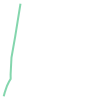

In [217]:
kg_shore

In [220]:
lineStringDistance = kg_shore.distance(coordinates.geometry.iloc[8])

In [221]:
lineStringDistance

54.50430691971028

In [225]:
df_clear['odległość_od_morza'] = coordinates['geometry'].apply(lambda p: kg_shore.distance(p))

In [226]:
df_clear['odległość_od_morza']

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6       54.507453
7       54.506554
8       54.504307
9       54.508363
10      54.507453
11      54.507453
12       0.000000
13       0.000000
14      54.511919
15      54.511919
16      54.511919
17      54.511919
18      54.511919
19      54.511919
20      54.511919
21      54.458756
22      54.458756
23      54.458756
24      54.458756
25      54.458756
26      54.458756
27      54.458756
28      54.458756
29       0.000000
30      54.513568
31       0.000000
32       0.000000
33      54.511919
34       0.000000
35       0.000000
36       0.000000
37      54.552276
38      54.513568
39      54.555523
40      54.460347
41      54.508363
42      54.530996
43       0.000000
44       0.000000
45       0.000000
46       0.000000
47      54.511919
48      54.663247
49       0.000000
50      54.511919
51       0.000000
52      54.508295
53      54.511919
54      54.511919
55      54

In [ ]:
df_clear.to_csv("Numeric_data.csv", sep=";")